# Úkoly

In [1]:
import numpy as np
import matplotlib.pyplot as plt

1. Vygenerujte náhodná data a zobrazte je jako scatter plot pomocí. Nastavte barvu a velikost bodů.

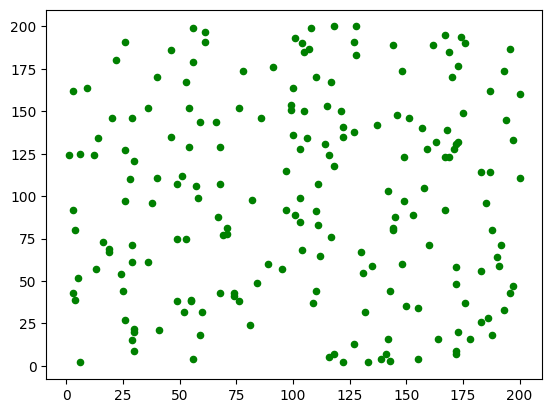

In [2]:
x = np.random.randint(1, 201, 200)
y = np.random.randint(1, 201, 200)

fig, axes = plt.subplots()

axes.scatter(x, y, s=20, c="g")


2. Vykreslete 3D graf s funkcí $$z = \frac{\sin(\sqrt{x^2 + y^2})}{\sqrt{x^2 + y^2}}$$ Použijte `imshow` a `contour`.


In [3]:
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)

X, Y = np.meshgrid(x, y)

Z = np.sin(np.sqrt((X**2) + (Y**2)))/np.sqrt((X**2) + (Y**2))
Z = Z.T

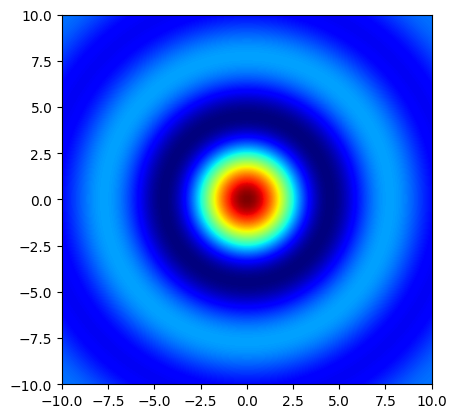

In [4]:
fig, axes = plt.subplots()

axes.imshow(Z, cmap="jet", vmin=Z.min(), vmax=Z.max(), extent=[-10, 10, -10, 10])

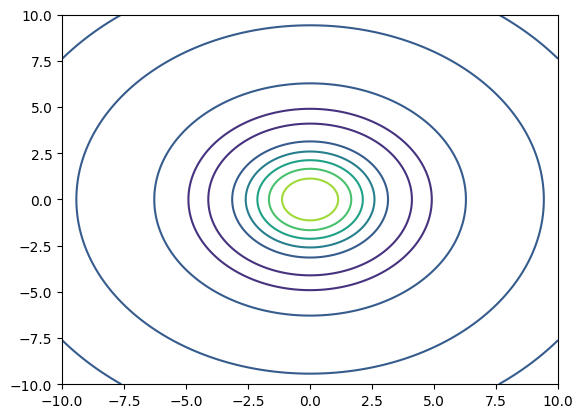

In [5]:
fig, axes = plt.subplots()

axes.contour(X, Y, Z)


3. Vykreslete polar graf s funkcí $r = 2\sin(3θ)$. Použijte funkci plot a nastavte barvu, osy a titulek.


Text(0.5, 1.0, '$r = 2\\sin(3θ)$')

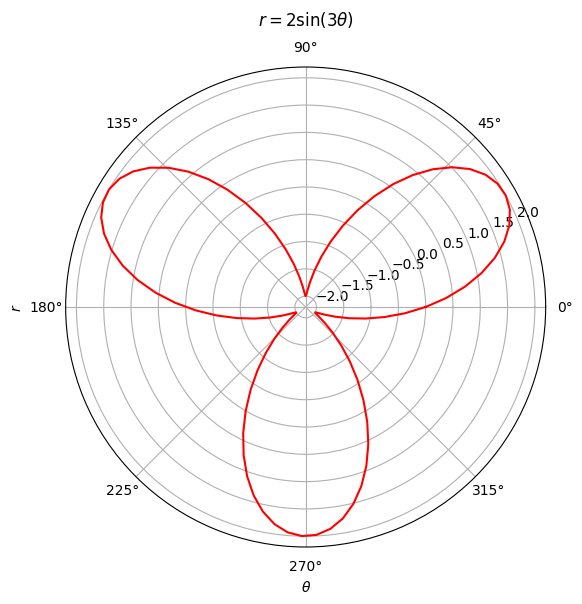

In [6]:
fig = plt.figure()

axes = fig.add_axes([0.0, 0.0, 1, 1], polar = True)

th = np.linspace(0, 2 * np.pi, 100)
r = 2*np.sin(3*th)

axes.plot(th, r, color="red")
axes.set_xlabel(r'$θ$')
axes.set_ylabel(r'$r$', labelpad = 30)
axes.set_title(r'$r = 2\sin(3θ)$', pad = 30)


4. Vygenerujte náhodná data a zobrazte je jako histogram. Nastavte počet binů, barvu a popisky os.


Text(0, 0.5, 'Pocet')

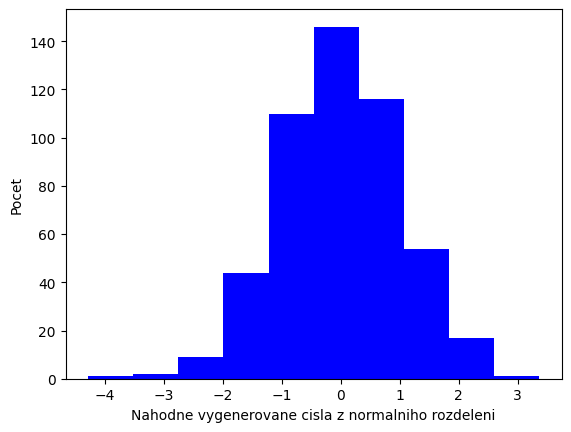

In [7]:
nums = np.random.randn(500)

fig, axes = plt.subplots()

axes.hist(nums, 10, color="blue")
axes.set_xlabel("Nahodne vygenerovane cisla z normalniho rozdeleni")
axes.set_ylabel("Pocet")


5. Vytvořte 3D surf graf s funkcí $$z = \cos(\sqrt{x^2 + y^2})$$


In [8]:
from mpl_toolkits.mplot3d import Axes3D

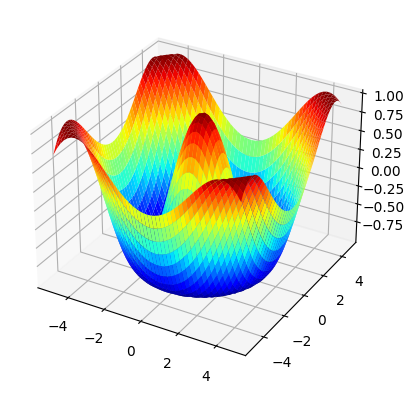

In [9]:
X, Y = np.meshgrid(np.arange(-5, 5, 0.2), np.arange(-5, 5, 0.2))

Z = np.cos(np.sqrt((X**2)+(Y**2)))

fig = plt.figure()

axes = fig.add_subplot(111, projection='3d')
axes.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet')

# Domácí úkol
Použijte funkce z minulého úkolu `integer_spiral_numpy` a `integer_spiral`. 
1. Vykreslete spirálu (např pro n=101) a sinus hodnot ve spirále pomocí `imshow` a `contour`.
2. Měřte časy výpočtu pro `integer_spiral_numpy` a `integer_spiral` pro různé hodnoty mezi 11 a 1001 a porovnejte je.
3. Vykreslete log-log (obě osy v logaritmickém měřítku) graf obou časů výpočtů do jednoho grafu, nastavte popisky, legendu a osy.
4. Co vypovídají tyto grafy o výpočetních náročnostech obou funkcí? co reprezentuje sklon lineárního grafu v log-log grafu? 
    - hint $g(x) = ax$ v log-log grafu ve skutečnosti znamená, že původní funkce vypadá: $\log (f(x)) = a \log(x)$, jaká je tedy $f(x)$?

In [10]:
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_row -= 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj

def integer_spiral_numpy(n):

    if n == 1:
        
        return np.ones((n, n), dtype=int)
    
    else:

        n_layers = (n - 1)//2
    
        mat = np.zeros((n + 1, n + 1), dtype=int)

        mat[n//2 + 1, n//2 + 1] = 1

        row_idx = n//2 + 1 - 1
        col_idx = n//2 + 1

        nums_processed = 1

        for i in range(1, n_layers + 1):

            slice_len = 2*i

            num_idx = nums_processed + 1
            mat[row_idx, col_idx:col_idx - slice_len:-1] = np.arange(num_idx, num_idx + slice_len)
            nums_processed += slice_len

            num_idx = nums_processed + 1
            mat[row_idx + 1:row_idx + 1 + slice_len:, col_idx - slice_len + 1] = np.arange(num_idx, num_idx + slice_len)
            nums_processed += slice_len
            
            num_idx = nums_processed + 1
            mat[row_idx + slice_len, col_idx - slice_len + 2:col_idx + 2:] = np.arange(num_idx, num_idx + slice_len)
            nums_processed += slice_len

            num_idx = nums_processed + 1
            mat[row_idx + slice_len - 1:row_idx - 1:-1, col_idx + 1] = np.arange(num_idx, num_idx + slice_len)
            nums_processed += slice_len

            row_idx -= 1
            col_idx += 1
        
        return mat[1::, 1::]

In [11]:
mat_integer_spiral = integer_spiral_numpy(101)

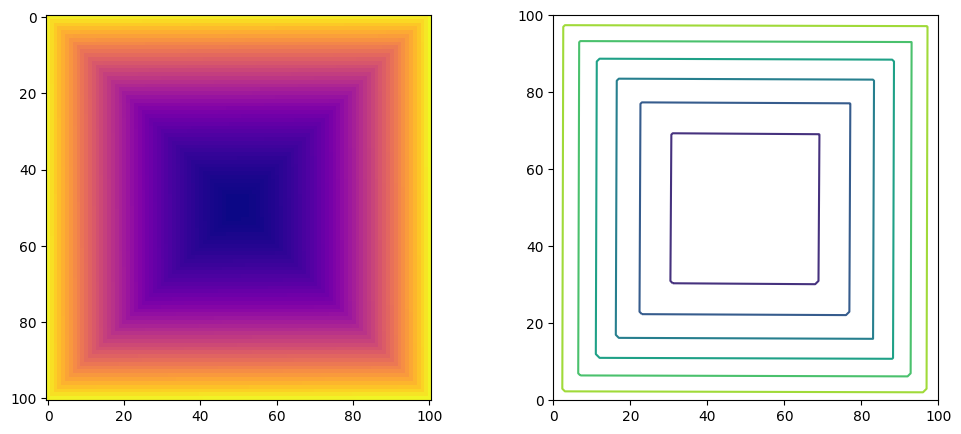

In [12]:
fig, axes = plt.subplots(1, 2, figsize = (12,5))

axes[0].imshow(mat_integer_spiral, cmap = "plasma")
axes[0].set_aspect('equal', adjustable='box')

axes[1].contour(mat_integer_spiral)
axes[1].set_aspect('equal', adjustable='box')

In [13]:
mat_sin_spiral = np.sin(mat_integer_spiral*0.03)

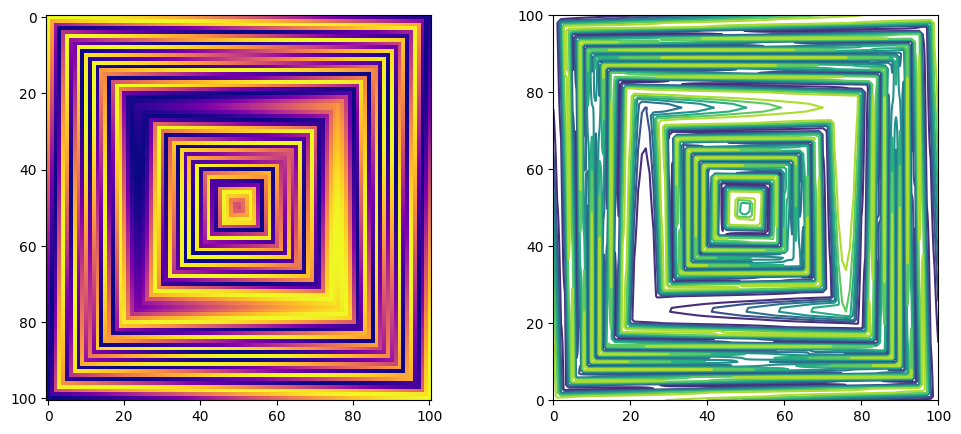

In [14]:
fig, axes = plt.subplots(1, 2, figsize = (12,5))

axes[0].imshow(mat_sin_spiral, cmap = "plasma")
axes[0].set_aspect('equal', adjustable='box')

axes[1].contour(mat_sin_spiral)
axes[1].set_aspect('equal', adjustable='box')

In [15]:
from timeit import default_timer as timer

integer_spiral_times_measured = []
integer_spiral_numpy_times_measured = []

for i in range(11, 1002, 10):

    start = timer()
    mat = integer_spiral(i)
    end = timer()

    time_measured = end - start
    integer_spiral_times_measured.append(time_measured)

    start = timer()
    mat = integer_spiral_numpy(i)
    end = timer()

    time_measured = end - start
    integer_spiral_numpy_times_measured.append(time_measured)


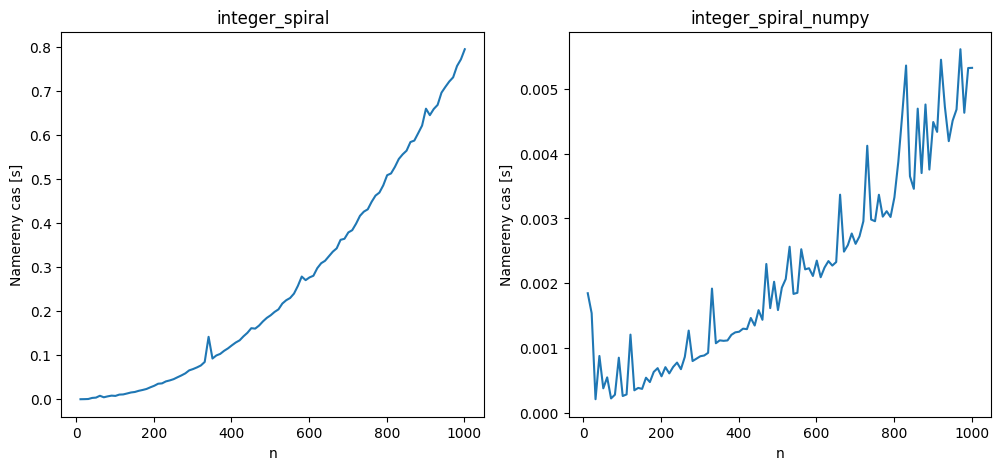

In [16]:
n = np.arange(11, 1002, 10)

fig, axes = plt.subplots(1, 2, figsize = (12, 5))

axes[0].plot(n, integer_spiral_times_measured)
axes[0].set_title("integer_spiral")

axes[1].plot(n, integer_spiral_numpy_times_measured)
axes[1].set_title("integer_spiral_numpy")

for ax in axes:

    ax.set_xlabel("n")
    ax.set_ylabel("Namereny cas [s]")

- pro dané vstupy $n \in [11, 1001]$ funkce `integer_spiral_numpy` běží kratší čas než funkce `integer_spiral`
- z grafů lze vidět, že u dat, získaných z měření času běhu funkce `integer_spiral_numpy`, je větší míra šumu

Text(0, 0.5, 'Namereny cas [s]')

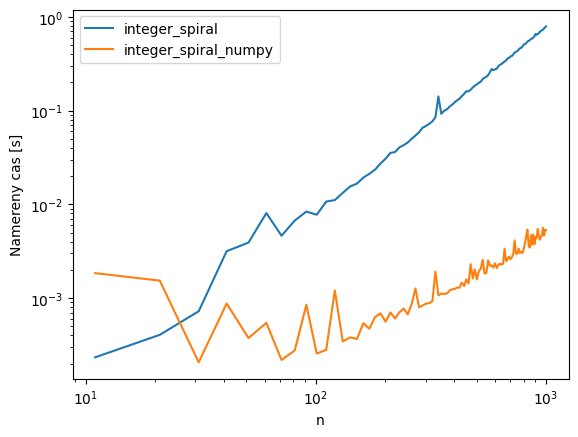

In [17]:
fig, axes = plt.subplots()

axes.plot(n, integer_spiral_times_measured, label="integer_spiral")
axes.plot(n, integer_spiral_numpy_times_measured, label="integer_spiral_numpy")

axes.legend()

axes.set_xscale("log")
axes.set_yscale("log")

axes.set_xlabel("n")
axes.set_ylabel("Namereny cas [s]")

- s rostoucím vstupem $n$, roste čas běhu funkce `integer_spiral` rychleji než čas běhu funkce `integer_spiral_numpy`

Mějme v log-log grafu lineární funkci $g(x)$ se sklonem $a$ (funkce $g(x)$ má tedy tvar $g(x) = ax$). Pak bude mít tato funkce v ''normálním'' grafu tvar $g(x) = x^{a}$. Sklon $a$ lineární funkce v log-log grafu je tedy zároveň exponentem příslušné mocninné funkce v grafu ''normálním''.

# Bonusový úkol
Použijte funkci `polyfit` z knihovny `numpy` pro logaritmicky transponované časy a počty prvků a zjistěte koeficient u lineární funkce při aproximaci polynomem 1. stupně.

Vykreslete lineární aproximace získané funkci `polyfit` do log-log grafu společne s naměřenými daty.

In [18]:
log_integer_spiral_times_measured = np.log10(integer_spiral_times_measured)
log_integer_spiral_numpy_times_measured  = np.log10(integer_spiral_numpy_times_measured)

log_n = np.log10(n)

p = np.polyfit(log_n, log_integer_spiral_times_measured, 1)
a1, b1 = p

p = np.polyfit(log_n, log_integer_spiral_numpy_times_measured, 1)
a2, b2 = p

print("Koeficienty u linearnich funkci pri aproximaci polynomem 1. stupne:")
print("integer_spiral: " + str(a1))
print("integer_spiral_numpy: " + str(a2))

Koeficienty u linearnich funkci pri aproximaci polynomem 1. stupne:
integer_spiral: 1.8845954336721575
integer_spiral_numpy: 0.7250407602118899


Text(0, 0.5, 'Namereny cas [s]')

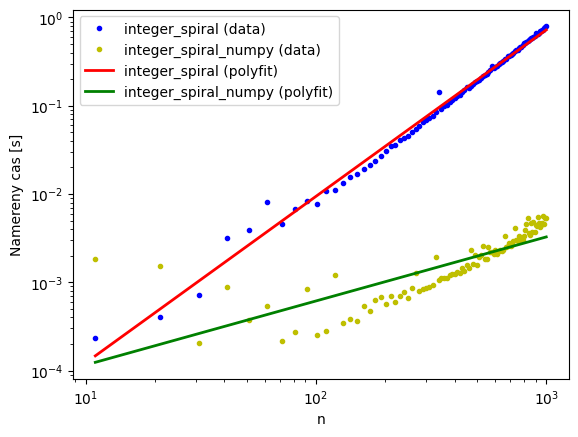

In [19]:
fig, axes = plt.subplots()

axes.plot(n, integer_spiral_times_measured, "o", ms = 3, color="b", label = "integer_spiral (data)")
axes.plot(n, integer_spiral_numpy_times_measured, "o", ms = 3, color="y", label = "integer_spiral_numpy (data)")

axes.plot(n, (n**a1)*(10**b1), color="r", lw=2, label = "integer_spiral (polyfit)")
axes.plot(n, (n**a2)*(10**b2), color="g", lw=2, label = "integer_spiral_numpy (polyfit)")

axes.legend()

axes.set_xscale("log")
axes.set_yscale("log")

axes.set_xlabel("n")
axes.set_ylabel("Namereny cas [s]")